# Salon2 Lecture 1 - Feb 3, 2015

## 0. The philosophy of the computational salon

On learning by doing: 

* [Ericsson et al. 1993](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/DeliberatePractice%28PsychologicalReview%29.pdf) Psychological Review 100, 363-406 (_The Role of Deliberate Practice in the Acquisition of Expert Performance_): "The maximal level of performance for individuals in a given domain is not attained automatically as a function of extended experience, but the level of performance can be increased even by highly experienced individuals as a result of deliberate efforts to improve. [...] The most effective learning requires a well-defined task with an appropriate difficulty level for the particular individual, informative feedback, and opportunities for repetition and corrections of errors."
* Picasso: "When art critics get together they talk about Form and Structure and Meaning. When artists get together they talk about where you can buy cheap turpentine." Venkatesh Rao on the (bad) [Turpentine Effect](http://www.ribbonfarm.com/2010/03/18/the-turpentine-effect). 

## 1. Introduction to the beauty and power of Python

Experimenting with [Jupyter notebook](https://jupyter.org/)...

* Hit `Enter` to start writing in a cell; hit `Shift-Enter` to execute it and see the result.
* You alternate between *edit mode*, where you change the content of cells, and *command mode*, where you work with full cells: you can add one with `a` or `b`, delete one with `dd`, change its type with `1`, `2`, `3`, `4` for titles, `y` for code, and `m` for [markdown](http://daringfireball.net/projects/markdown/syntax), a very terse formatting language good for documentation and even [formulas](http://www.mathjax.org/).

In [1]:
2+2

4

Python contains its own mantras...

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Technical characteristics of Python:

* a general purpose, high-level, interpreted, object-oriented language
* **strongly** but **dynamically** typed
* **names**, not variables
* **mutable** and **immutable** types
* name-based **polymorphism** (duck typing)
* automatic memory management
* error management by exceptions (EAFP)
* extensive standard library and third-party modules and packages

Python features we will see today:

* types and "variables"
* loops
* the print statement
* lists, tuples, dictionaries
* strings (a little)
* list comprehensions and generator expressions
* functions
* import modules

See [Johansson's tutorial](https://github.com/jrjohansson/scientific-python-lectures) and the list of tutorials at the bottom of this document.

### 1.1 Let's make pi.. and find the Feynman point

> The Feynman point is a sequence of six 9s that begins at the 762nd decimal place of the decimal representation of π. It is named after physicist Richard Feynman, who once stated during a lecture he would like to memorize the digits of π until that point, so he could recite them and quip "nine nine nine nine nine nine and so on" (wikipedia)

#### 1.1.1 With the arctan series.

Leibniz–Gregory 1668 series for the arctangent [@roy1990],

$$\arctan(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \cdots,$$

(which follows, e.g., by starting with $\arctan(x) = \int dx/(1+x^2)$, using the geometric series $1/(1 + x^2) = \sum_k x^{2k}$, and integrating) and therefore

$$\arctan(1) = \frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} \cdots.$$

As it would be in C (note the "magic" `%%file` that writes to a file in a sufficiently new iPython):

In [3]:
%%file piseries.c

#include <stdio.h>
#include <math.h>

int main(int argc,char **argv) {
    int terms = 100, n;
    double acc = 0.0, pi;

    for(n=0;n<terms;n++) {
        /* could also do 1.0 - 2.0 * (n % 2) or (n % 2) ? -1.0 : 1.0  */
        /* note that we need at least one float here otherwise we get integer division */
        acc += pow(-1.0,n) / (2*n+1);
    }

    pi = 4 * acc;

    printf("After %d terms, pi = %f\n",terms,pi);

    return 0;
}

Writing piseries.c


(Running shell commands with "`!`" in iPython.)

In [5]:
!gcc piseries.c -o piseries -lm

In [6]:
!./piseries

After 100 terms, pi = 3.131593


Let's take the C apart and see if we can come up with Python.

* First, remove all braces; indentation is still sufficient to specify structure.
* Next, remove also semicolons; line endings will do (backslash to continue).
* The `int main` declaration is also superfluous, especially given that we don't take command-line arguments. Then we can indent everything back. So is the `return 0`.
* In Python, there's no need to declare the type of variables, since it's determined at runtime.
* The `for` line is not very expressive because it concerns us with the mechanics of the counter. We replace it with the more description Python form.
* `pow` is just `**`, and we don't need `math.h` to use it.
* `printf` becomes `print`, with rather similar syntax (a case where the Python designer thought it useful to rely on programmers' experience with C); it does not need `stdio.h` though, nor the final `\n`.

In [7]:
terms = 100
acc = 0.0

for n in range(terms):
    acc += (-1.0)**n / (2*n+1)

pi = 4 * acc

print("After %d terms, pi = %f" % (terms,pi))

After 100 terms, pi = 3.131593


This is much terser, but it's still influenced heavily by the programming logic that we need in C. We can make it more _Pythonic_ by using Python's built-in `sum`, and Python's _generator expression_ (an object that returns a sequence of other objects built from a rule).

In [8]:
terms = 100

pi = 4 * sum((-1.0)**n / (2*n+1) for n in range(terms))

print("After %d terms, pi = %f" % (terms,pi))

After 100 terms, pi = 3.131593


If we make this into a function, we can have some fun with it, such as monitor its convergence.

In [9]:
def pi_leibniz(terms):
    return 4 * sum((-1.0)**n / (2*n+1) for n in range(terms))

We need to _import_ a couple of modules. `math` to give us the exact value of pi, and `matplotlib` to plot its error.

In [11]:
import math
import matplotlib.pyplot as mp

In iPython notebook, this magic makes sure that we can plot inside the notebook.

In [12]:
%matplotlib inline

Here we use a _list comprehension_ to build a Python _list_ of the errors made in computing pi. 

Text(0.5,1,'pi with arctan series')

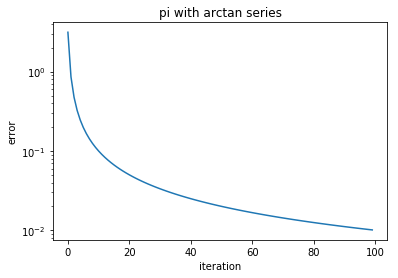

In [13]:
error_leibniz = [abs(pi_leibniz(i) - math.pi) for i in range(100)]

mp.semilogy(error_leibniz)

# show what we're plotting
mp.xlabel('iteration')
mp.ylabel('error')
mp.title('pi with arctan series')

Convergence is not so great! It's actually linear in the number of terms: the error decreases only as $k^{-1}$, since the $k$-th residual is bounded by $1/(2k+3)$. So the cost of new digits rises exponentially.

#### 1.1.2 With Archimedes' exhaustion principle

To do better, we leave Leibniz and go back to Archimedes.

It seems fitting that we start with the first known algorithm to do so, devised by none other than Archimedes (circa 287–211 B.C.). He figured out that the perimeters of regular polygons inscribed and circumscribed around the unit circle would represent lower and higher bounds to $2\pi$, of increasing accuracy as the number of sides increases. Using hexagons, the circumscribed semiperimeter comes to $a_0 = 2 \sqrt{3}$, and the inscribed semiperimeter to $b_0 = 3$.

[Here we include the figure `archimedes-1.png` in this directory using the Markdown syntax.]

![Archimedes' geometric scheme to approximate $\pi$.](./archimedes-1.png)

Using only geometric reasoning, Archimedes' was able to work out the change in the two perimeters when the number of sides is doubled, and he applied this step four times (up to 96-gons), obtaining $b_4 < \pi < a_4$, namely $\frac{223}{71} < \pi < \frac{22}{7}$, or $3.1408 < \pi < 3.1429$. Archimedes didn't have decimal numbers, which makes his work even more remarkable.[^1]
The iterative nature of the algorithm makes it possible to compute $\pi$ (at least in principle) to any precision, and it can be rightfully said to mark the birth of both numerical and error analysis. Indeed, Archimedes' process of _exhaustion_ anticipates modern integration... but that's another story.

From a modern viewpoint, it is hard to resist using trigonometry to reproduce Archimedes' doubling step, which in fact makes it quite painless. Given the perimeters

$$a_n = 6 \times 2^n \, \tan \theta_n, \quad
b_n = 6 \times 2^n \, \sin \theta_n, \quad
\theta_n = \frac{\pi}{6 \times 2^n},$$

we need to find $a_{n+1}$ and $b_{n+1}$ given $a_n$, $b_n$. A quick look at our high-school trigonometry book suggests the bisection formulas,

$$\tan \theta_{n+1} = \tan(\theta_n/2) = \frac{\sin \theta_n}{1 + \cos \theta_n}, \quad
\sin \theta_{n+1} = \sin(\theta_n/2) = \pm \sqrt{\frac{1 - \cos \theta_n}{2}};$$

and after some rumination, we succeed in assembling

$$a_{n+1} = \frac{2 a_n b_n}{a_n + b_n}, \quad
b_{n+1} = \sqrt{a_{n+1} b_n}.$$

The iteration can be seeded with the hexagon ($\theta_0 = \pi/6$, $a_n = 2 \sqrt{3}$, $b_n = 3$).

In [14]:
def pi_archimedes(iters):
    a, b = 2 * math.sqrt(3), 3    # tuple unpacking
        
    for i in range(iters):        # iterate from i = 0 to n-1, C-style
        a = 2 * a * b  / (a + b)
        b = math.sqrt(a * b)
        
    return a                      # return the higher bound

Nice!

In [15]:
pi_archimedes(10)

3.1415929273850964

If we want to be more Pythonic, we can define an iterator operator/function, and apply it repeatedly. Here we learn that functions are _first-class objects_ in Python... and also about _tuples_.

In [16]:
def iteration_archimedes(a,b):
    a = 2 * a * b  / (a + b)
    b = math.sqrt(a * b)
    
    return a,b          # return a,b as a tuple


# a generic function to iterate function "func" n times, starting from x
def iterate(func,x,n):
    for i in range(n):
        x = func(*x)    # Python idiom to unpack the tuple x into individual arguments
        
    return x

def pi_archimedes2(iters):
    a, b = iterate(iteration_archimedes,(2*math.sqrt(3),3),iters)
    return a

Note however that `iterate` wouldn't work on functions with a single argument, because it won't be able to unpack it.

In [17]:
def square(x):
    return x*x

iterate(square,2,4)

TypeError: square() argument after * must be an iterable, not int

For that we need a slightly more verbose iterator:

In [18]:
def iterate2(func,x,n):
    for i in range(n):
        x = func(*x) if isinstance(x,tuple) else func(x)
        
    return x

iterate2(square,2,5)

4294967296

Back to Archimedes iteration, its convergence is very fast! But it saturates at an error of $10^{-15}$, because Python uses double precision floating point numbers. Not enough to find the Feynman point!

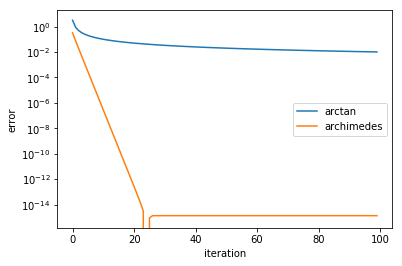

In [19]:
error_archimedes = [abs(pi_archimedes(i) - math.pi) for i in range(100)]

mp.semilogy(error_leibniz)
mp.semilogy(error_archimedes)

# show what we're plotting
mp.xlabel('iteration')
mp.ylabel('error')
mp.legend(['arctan','archimedes'],loc='center right')

(The drop after the 20th iteration is where the `archimedes` estimate happens to match the finite-precision value of `math.pi`. Beyond that point, we cannot truly assess the accuracy of the result.)

To get more digits, we can appeal to the "batteries included" quality of Python; the quick Googling of "python arbitrary precision arithmetics" (which is what we need) yields a link to `mpmath`. Perusing that webpage (http://mpmath.org) convinces us of the credentials of that package. If you are running on Binder, the package is already preinstalled; otherwise, you can install it with `pip` (https://pip.pypa.io/en/latest/); from this notebook, you can run `!pip install mpmath`.

`mpmath` provides replacements for most math functions, and allows us to create a higher-precision float using `mpf`. The digits of precision are set by `mpmath.mp.dps`.

In [20]:
math.exp(10.0)

22026.465794806718

In [21]:
import mpmath

mpmath.mp.dps = 30

a = mpmath.mpf(10.0)
mpmath.exp(a)

mpf('22026.4657948067165169579006452833')

Moreover, the `mpmath`ness of the `mpf` objects is contagious:

In [22]:
mpmath.mpf(2.0) + 2.0

mpf('4.0')

This means that we need only a tiny modification to our iteration code, which seeds it with an `mpf` object, and which replaces the `sqrt` function:

In [23]:
def iteration_archimedes_mpmath(a,b):
    a = 2 * a * b  / (a + b)
    b = mpmath.sqrt(a * b)
    
    # return a,b as a tuple
    return a,b

def pi_archimedes_mpmath(iters):
    a, b = iterate(iteration_archimedes_mpmath,(2*mpmath.sqrt(3),3),iters)
    return a

In [24]:
mpmath.mp.dps = 1000

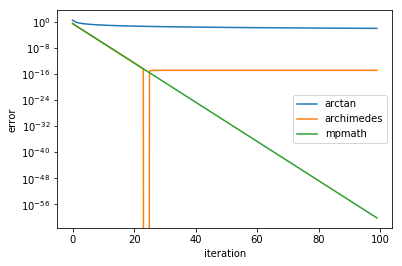

In [25]:
error_archimedes_mpmath = [abs(pi_archimedes_mpmath(i) - mpmath.pi) for i in range(100)]

mp.semilogy(error_leibniz)
mp.semilogy(error_archimedes)
mp.semilogy(error_archimedes_mpmath)

# show what we're plotting
mp.xlabel('iteration')
mp.ylabel('error')
mp.legend(['arctan','archimedes','mpmath'],loc='center right')

#### 1.1.3 Find Feynman's point

To find Feynman's point, we convert the `mpf` to a string with the `str` constructor, and use the string method `find` to yield the position where the six nines begin.

In [26]:
pi_archimedes_mpmath(1500)

mpf('3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598486857121064092774915854716387423296376442498044366963837290348746006879381498024826916267

In [27]:
# find '999999'; we add one two the resulting index to account for Python's
# zero indexing, and subtract two to account for the initial "3."
str(pi_archimedes_mpmath(1500)).find('999999') - 1

762

#### 1.1.4 In-class exercises

Compute pi using Machin's formula

$$\frac{\pi}{4} = 4 \arctan{\frac{1}{5}} - \arctan{\frac{1}{239}}$$

and plot its convergence.

**And/or** compute pi using Brent–Salamin recursion

$$
\left\{\begin{array}{l} a_0 = 1 \\ g_0 = \frac{1}{\sqrt{2}} \end{array}\right. \quad
\left\{\begin{array}{l} a_{n+1} = \frac{a_n + g_n}{2} \\ g_{n+1} = \sqrt{a_n g_n} \end{array}\right.
$$

and

$$
\pi \simeq \frac{4 a_n^2}{1 - \sum_{j=1}^n 2^{j+1} d_j} \quad \text{with} \quad
d_n = a_n^2 - g^2_n.
$$

### 1.2 References and homework

Even _Nature_ [endorses Python](http://www.nature.com/news/programming-pick-up-python-1.16833) as _the_ language for scientific computing!

#### 1.2.1 Python references and tutorials

The standard (but very good) Python tutorial:

* http://docs.python.org/tutorial

In order of complexity, for scientific applications:

* https://github.com/jrjohansson/scientific-python-lectures
* https://scipy-lectures.github.io/index.html
* http://nbviewer.ipython.org/gist/rpmuller/5920182

Interesting (but incomplete) notes on software development with Python:

* http://docs.python-guide.org/en/latest

On Pythonic style:

* http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html
* http://docs.python-guide.org/en/latest/writing/style/

Guido van Rossum's "History of Python" blog:

* http://python-history.blogspot.com
* Its introduction to Python: http://python-history.blogspot.com/2009/01/introduction-and-overview.html
* Python's design principles: http://python-history.blogspot.com/2009/01/pythons-design-philosophy.html

#### 1.2.2 Homework: anagrams

Using a dictionary of English words:
* plot the number of anagrams as a function of length;
* plot the number of *perfect* anagrams, where we define a perfect anagram as a pair of words where every letter has different neighbors in each (for instance, anatomicophysiologic/physiologicoanatomic is very far from being perfect);
* which is the longest perfect anagram.

I'll start you off with reading a list of dictionary words.

In [32]:
!head lecture1-files/words.txt

A
a
aa
aal
aalii
aam
Aani
aardvark
aardwolf
Aaron


In [33]:
words = [line.strip().lower() for line in open('lecture1-files/words.txt','r')]

In [34]:
len(words)

235886

In [35]:
words[:10]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron']

*Hint*: anagrams are pairs of words that are the same when sorted, so you could build a Python dictionary of words indexed by their sorted *key*.